# Modelos preditivos autoregressivos

## Exemplo com dataset do PIB

In [193]:
# Carga de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

# Carga de dados
dados = pd.read_csv("https://raw.githubusercontent.com/DiogoWorkGit/Python_Notebooks/master/csv/pib.csv")

# Separação de treino e teste
treino = dados.iloc[0:126]
teste = dados.iloc[126:138]

# Modelo AutoRegressivo
Y_treino = treino.iloc[:,[2]]
X = ['PIBi1', 'PIBi2']
X_treino = treino.loc[:,X]
mod = LinearRegression()
mod.fit(X_treino, Y_treino)

# Análise de coeficientes
print(mod.coef_)
print(mod.intercept_)

# Cálculo de erro com python
X_teste = teste.loc[:,X]
Y_prev = mod.predict(X_teste)
Y_real = teste.loc[:,['PIB']]
Erro = Y_prev - Y_real

# Erro de previsão
print(mae(Y_real, Y_prev))

[[0.56910052 0.40531756]]
[3.87378258]
2.524331327151247


In [194]:
# Como construir colunas com lag
dados['PIBi1_'] = dados['PIB'].shift(1)
dados['PIBi2_'] = dados['PIB'].shift(2)

dados.head(15)

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBi2_
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,NaN
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,NaN
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,103.09
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43,102.05
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77,110.43
5,6,jun/04,109.19,89.25,119.93,96.11,87.79,128.51,96.83,84.00,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,108.08,106.77
6,7,jul/04,111.95,100.39,125.64,106.03,100.22,135.26,108.01,98.32,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,109.19,108.08
7,8,ago/04,110.92,94.20,129.67,102.13,93.66,139.38,103.81,87.53,...,110.43,102.05,103.09,103.91,104.10,106.27,104.52,102.59,111.95,109.19
8,9,set/04,110.18,95.54,126.70,102.50,94.93,138.84,104.68,91.66,...,106.77,110.43,102.05,103.09,103.91,104.10,106.27,104.52,110.92,111.95
9,10,out/04,109.71,99.46,124.85,105.14,98.58,136.18,106.93,93.66,...,108.08,106.77,110.43,102.05,103.09,103.91,104.10,106.27,110.18,110.92


## Contrução de modelo autoregressivo com dados de vendas

In [195]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/desafio_baba.csv")
print(df.shape)
df

(396, 10)


,Unnamed: 0,X,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,1,1,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,2,2,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,3,3,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,4,4,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,5,5,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...,...,...
391,392,392,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
392,393,393,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
393,394,394,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0
394,395,395,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0


In [196]:
df.isna().sum()

Unnamed: 0     0
X              0
date           0
mes            0
weekday        0
margem         0
venda         31
desconto       0
outdesc        0
outmg          0
dtype: int64

In [197]:
# Como foi verificado um número baixo de variaveis NaN, vou retirar os valores para realizarmos as previsões

df.dropna(inplace= True)
df.drop(columns=['Unnamed: 0', 'X'], inplace=True)

In [198]:
# Tratamento de data
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...
360,2015-07-27,julho,segunda-feira,0.394510,43796.980,3487.843143,0,0
361,2015-07-28,julho,terca-feira,0.480154,71934.730,4965.290000,0,0
362,2015-07-29,julho,quarta-feira,0.446441,124043.650,3477.950004,0,0
363,2015-07-30,julho,quinta-feira,0.429696,47482.530,4328.840013,0,0


<Axes: xlabel='date', ylabel='venda'>

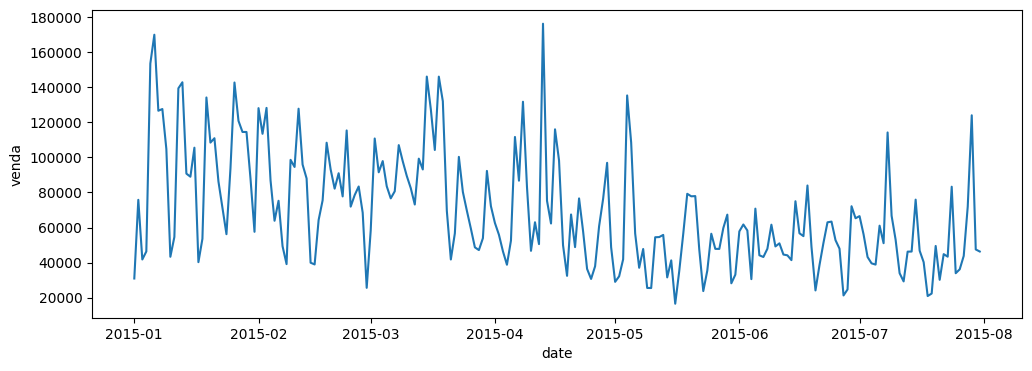

In [199]:
# Verificação de sazonalidade

ax = sns.lineplot(x='date', y='venda', data= df.query("date.dt.year == 2015"))
ax.figure.set_size_inches(12, 4)
ax

In [200]:
# Criar um lag de 31 pontos para verificação

for i in range(1, 32, 1):
    df[f'venda_i{i}'] = df['venda'].shift(i)

In [201]:
df.head(5)

,date,mes,weekday,margem,venda,desconto,outdesc,outmg,venda_i1,venda_i2,...,venda_i22,venda_i23,venda_i24,venda_i25,venda_i26,venda_i27,venda_i28,venda_i29,venda_i30,venda_i31
0,2014-08-01,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-08-02,agosto,sabado,0.416022,58377.320,5713.043012,0,0,110042.460,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-08-03,agosto,domingo,0.431993,64635.390,8621.708915,0,0,58377.320,110042.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-08-04,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,64635.390,58377.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-08-05,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,140417.321,64635.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# Para fazer a previsão precisamos tirar os registros NaN então vamos fazer novamente um dropna

df.dropna(inplace= True)
df.reset_index()

,index,date,mes,weekday,margem,venda,desconto,outdesc,outmg,venda_i1,...,venda_i22,venda_i23,venda_i24,venda_i25,venda_i26,venda_i27,venda_i28,venda_i29,venda_i30,venda_i31
0,31,2014-09-01,setembro,segunda-feira,0.378133,83200.800,5636.335222,0,0,58287.780,...,91762.200,111870.410,112071.100,133359.232,129662.053,149700.286,140417.321,64635.390,58377.320,110042.460
1,32,2014-09-02,setembro,terca-feira,0.434359,95449.441,10975.259970,0,0,83200.800,...,137730.940,91762.200,111870.410,112071.100,133359.232,129662.053,149700.286,140417.321,64635.390,58377.320
2,33,2014-09-03,setembro,quarta-feira,0.409208,86219.960,7407.436157,0,0,95449.441,...,128099.411,137730.940,91762.200,111870.410,112071.100,133359.232,129662.053,149700.286,140417.321,64635.390
3,34,2014-09-04,setembro,quinta-feira,0.404938,99481.000,8882.818775,0,0,86219.960,...,118893.844,128099.411,137730.940,91762.200,111870.410,112071.100,133359.232,129662.053,149700.286,140417.321
4,35,2014-09-05,setembro,sexta-feira,0.410920,78161.402,8091.206437,0,0,99481.000,...,123830.082,118893.844,128099.411,137730.940,91762.200,111870.410,112071.100,133359.232,129662.053,149700.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,360,2015-07-27,julho,segunda-feira,0.394510,43796.980,3487.843143,0,0,36155.770,...,38837.980,39549.300,43166.140,56121.850,66499.880,65285.520,72156.320,24655.520,21234.240,47910.240
330,361,2015-07-28,julho,terca-feira,0.480154,71934.730,4965.290000,0,0,43796.980,...,61044.880,38837.980,39549.300,43166.140,56121.850,66499.880,65285.520,72156.320,24655.520,21234.240
331,362,2015-07-29,julho,quarta-feira,0.446441,124043.650,3477.950004,0,0,71934.730,...,51054.730,61044.880,38837.980,39549.300,43166.140,56121.850,66499.880,65285.520,72156.320,24655.520
332,363,2015-07-30,julho,quinta-feira,0.429696,47482.530,4328.840013,0,0,124043.650,...,114249.030,51054.730,61044.880,38837.980,39549.300,43166.140,56121.850,66499.880,65285.520,72156.320


In [203]:
# Separação de dados de treino e teste
treino = df.query("date <= '2015-06-30'")
teste = df.query("date > '2015-06-30'")

X = ['venda_i1', 'venda_i2']
Y = ['venda']

X_treino = treino.loc[:,X]
Y_treino = treino.loc[:,Y]

X_teste = teste.loc[:,X]
Y_teste = teste.loc[:,Y]

In [204]:
# Modelo AutoRegressivo

mod = LinearRegression()
mod.fit(X_treino, Y_treino)

# Previsão

Y_prev = mod.predict(X_teste)

In [205]:
# Comparação
comparar = Y_teste.copy()
comparar['prev'] = Y_prev
comparar.head(3)

,venda,prev
334,66499.88,73995.968142
335,56121.85,74640.531264
336,43166.14,70120.690075


## Parte 1

Faça modelos autoregressivo para prever as quantidades de vendas por dia.

Pegue as seguintes métricas e forme uma tabela para comparando cada modelo:

- R² (chegue mais próximo de 1)
- P-valor (menor que 0.05)
- Erro Treino (quanto menor, melhor)
- Erro de teste absoluto (quanto menor, melhor)

Utilize a coluna 'venda' do dataset

In [206]:
def arredondar_pvalor(lista: list):
    return  [round(valor, 5) for valor in lista]

In [207]:
def mod_aut_reg(x: list, y: list, data, query: list):
# Separação de dados de treino e teste
    X, Y, df, args_query = x, y, data, query
    treino = df.query(args_query[0])
    teste = df.query(args_query[1])

    X_treino = treino[X]
    Y_treino = treino[Y]

    X_teste = teste[X]
    Y_teste = teste[Y]

# Modelo AutoRegressivo
    mod = LinearRegression()
    mod.fit(X_treino, Y_treino)

# Previsão
    Y_prev = mod.predict(X_teste)

#Pegar valores estátisticos
    # Valor R²
    r2 = mod.score(X_treino, Y_treino)

    # P-valor e
    mod_sm = sm.OLS(Y_treino, X_treino).fit() #modelo statsmodel
    pvalor = list(arredondar_pvalor(mod_sm.pvalues))
    # Valor do Erro padrão/Erro de treino
    errostd = mod_sm.bse[0]

    # Valor erro da previsão
    erroprev = mae(Y_teste, Y_prev)
    return r2, pvalor, errostd, erroprev, Y_prev

In [208]:
column_names = list(df.columns)

X = [
    column_names[8:10], # Lag 1~2
    column_names[8:14], # Lag 1~6
    column_names[8:15], # Lag 1~7
    column_names[8:22], # Lag 1~14
    column_names[8:23], # Lag 1~15
    column_names[8:24], # Lag 1~16
    column_names[8:35], # Lag 1~27
    column_names[8:36], # Lag 1~28
    column_names[8:37], # Lag 1~29
    column_names[8:38], # Lag 1~30
    column_names[8:39]  # Lag 1~31
]

nomes, valor_r2, p_valores, erro_medio, erro_prev = [],[],[],[],[]

for i in X:
    call = mod_aut_reg(i, ['venda'], df, ["date <= '2015-06-30'", "date > '2015-06-30'"])

    valor_r2.append(call[0])
    p_valores.append(call[1])
    erro_medio.append(call[2])
    erro_prev.append(call[3])
    nome = f'{i[0]} ~ {i[len(i)-1]}'
    nomes.append(nome)
    print(f'Feito: {i[0]} ~ {i[len(i)-1]}')


Feito: venda_i1 ~ venda_i2
Feito: venda_i1 ~ venda_i6
Feito: venda_i1 ~ venda_i7
Feito: venda_i1 ~ venda_i14
Feito: venda_i1 ~ venda_i15
Feito: venda_i1 ~ venda_i16
Feito: venda_i1 ~ venda_i27
Feito: venda_i1 ~ venda_i28
Feito: venda_i1 ~ venda_i29
Feito: venda_i1 ~ venda_i30
Feito: venda_i1 ~ venda_i31


In [209]:
results = pd.DataFrame({
    'Modelos': nomes,
    'R^2': valor_r2,
    'p-valor': p_valores,
    'Erro(treino)': erro_medio,
    'Erro(prev)': erro_prev
})

# Exportação do resultado
results.to_csv('/content/results.csv',
               index=False,
               sep='|',
               decimal=',')
results

,Modelos,R^2,p-valor,Erro(treino),Erro(prev)
0,venda_i1 ~ venda_i2,0.181948,"[0.0, 8e-05]",0.056173,25153.043296
1,venda_i1 ~ venda_i6,0.204048,"[0.0, 0.79696, 0.00807, 0.51783, 0.71437, 0.00...",0.056752,22973.587563
2,venda_i1 ~ venda_i7,0.241107,"[0.0, 0.71283, 0.01032, 0.9239, 0.65613, 0.346...",0.055813,20184.222591
3,venda_i1 ~ venda_i14,0.265791,"[0.0, 0.66007, 0.05344, 0.60425, 0.69163, 0.76...",0.058222,19041.882734
4,venda_i1 ~ venda_i15,0.267329,"[0.0, 0.67512, 0.05444, 0.61178, 0.68415, 0.76...",0.058853,19289.703041
5,venda_i1 ~ venda_i16,0.267371,"[0.0, 0.64584, 0.05812, 0.61536, 0.69267, 0.77...",0.058954,19353.679325
6,venda_i1 ~ venda_i27,0.293988,"[0.0, 0.63764, 0.11169, 0.43504, 0.69444, 0.97...",0.060107,17461.936284
7,venda_i1 ~ venda_i28,0.314344,"[0.0, 0.71618, 0.14209, 0.45083, 0.69176, 0.88...",0.059251,16222.751041
8,venda_i1 ~ venda_i29,0.314498,"[0.0, 0.71448, 0.14375, 0.45322, 0.69255, 0.88...",0.060385,16336.611296
9,venda_i1 ~ venda_i30,0.322911,"[0.0, 0.937, 0.16217, 0.41953, 0.65748, 0.8921...",0.060199,16956.748532


É possível observar que o modelo com o menor valor de erro de previsão foi o modelo:

### Venda_i1 ~ Venda_i28

O modelo apresentou um erro de previsão com o menor valor (16222,751041)



## Parte 2

Compare qual é a melhor opção entre:

1. Construir um modelo Autoregressivo somente utilizando a variável PIB (AR2, AR3, etc)

2. Construir um modelo Autoregressivo utilizando a variável ou variáveis de tráfego (BRL, BRL1, BRL2, etc) e, posteriormente, construir uma regressão multivariada (PIB com BRL e BRP).

Utilizando o dataset com informações sobre o PIB



In [210]:
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(3)

,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBi2_
0,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,99.72,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,NaN
1,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,99.24,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,NaN
2,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,118.44,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,103.09


ANO_MES     object
PIB        float64
BRL        float64
BRP        float64
BRT        float64
SLP        float64
SPP        float64
SPT        float64
PRL        float64
PRP        float64
PRT        float64
RJL        float64
RJP        float64
RJT        float64
D1           int64
D2           int64
D3           int64
D4           int64
D5           int64
D6           int64
D7           int64
D8           int64
D9           int64
D10          int64
D11          int64
PIBi1      float64
PIBi2      float64
PIBi3      float64
PIBi4      float64
PIBi5      float64
PIBi6      float64
PIBi7      float64
PIBi8      float64
PIBi9      float64
PIBi10     float64
PIBi11     float64
PIBi12     float64
PIBi1_     float64
PIBi2_     float64
dtype: object


[]

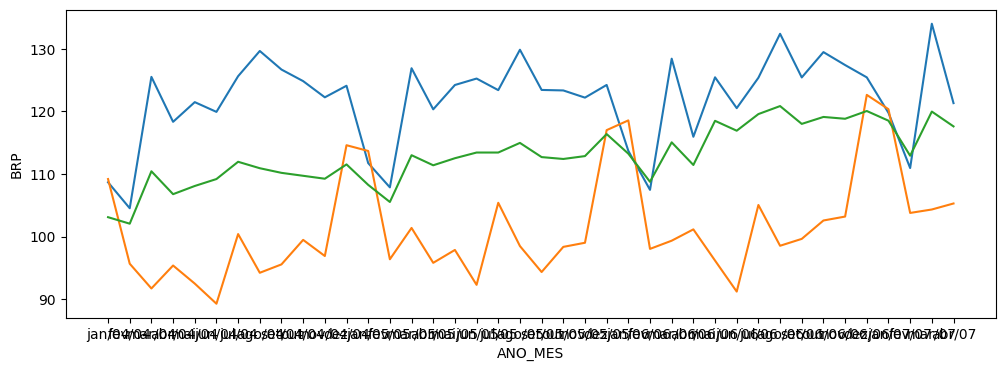

In [211]:
# Criação do lag das váriaveis que serão utilizadas (PIB já está criada)

print(dados.dtypes)


ax = sns.lineplot(x='ANO_MES', y='BRP', data= dados.iloc[0:40]) #BRP
ax = sns.lineplot(x='ANO_MES', y='BRL', data= dados.iloc[0:40]) #BRL
ax = sns.lineplot(x='ANO_MES', y='PIB', data= dados.iloc[0:40]) #PIB
ax.figure.set_size_inches(12, 4)
ax.plot()

In [212]:
#BRP
for i in range(1, 14, 1):
    dados[f'BRP_i{i}'] = dados['BRP'].shift(i)

#BRL
for i in range(1, 14, 1):
    dados[f'BRL_i{i}'] = dados['BRL'].shift(i)

print(dados.columns)

dados.head(3)

Index(['ANO_MES', 'PIB', 'BRL', 'BRP', 'BRT', 'SLP', 'SPP', 'SPT', 'PRL',
       'PRP', 'PRT', 'RJL', 'RJP', 'RJT', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'D8', 'D9', 'D10', 'D11', 'PIBi1', 'PIBi2', 'PIBi3', 'PIBi4',
       'PIBi5', 'PIBi6', 'PIBi7', 'PIBi8', 'PIBi9', 'PIBi10', 'PIBi11',
       'PIBi12', 'PIBi1_', 'PIBi2_', 'BRP_i1', 'BRP_i2', 'BRP_i3', 'BRP_i4',
       'BRP_i5', 'BRP_i6', 'BRP_i7', 'BRP_i8', 'BRP_i9', 'BRP_i10', 'BRP_i11',
       'BRP_i12', 'BRP_i13', 'BRL_i1', 'BRL_i2', 'BRL_i3', 'BRL_i4', 'BRL_i5',
       'BRL_i6', 'BRL_i7', 'BRL_i8', 'BRL_i9', 'BRL_i10', 'BRL_i11', 'BRL_i12',
       'BRL_i13'],
      dtype='object')


,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,...,BRL_i4,BRL_i5,BRL_i6,BRL_i7,BRL_i8,BRL_i9,BRL_i10,BRL_i11,BRL_i12,BRL_i13
0,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,99.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,99.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,118.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
dados.isna().sum()

ANO_MES     0
PIB         0
BRL         0
BRP         0
BRT         0
           ..
BRL_i9      9
BRL_i10    10
BRL_i11    11
BRL_i12    12
BRL_i13    13
Length: 65, dtype: int64

In [214]:
dados.dropna(inplace= True)
dados.reset_index(drop= True,inplace= True)

In [215]:
column_names = list(dados.columns)


X = [
    column_names[column_names.index('PIBi1'):column_names.index('PIBi12')+1], # Lag 1~12
]

nomes, valor_r2, p_valores, erro_medio, erro_prev = [],[],[],[],[]

for i in X:
    call = mod_aut_reg(i, ['PIB'], dados, query=['index <= 111', 'index > 111'])

    valor_r2.append(call[0])
    p_valores.append(call[1])
    erro_medio.append(call[2])
    erro_prev.append(call[3])
    nome = f'{i[0]} ~ {i[len(i)-1]}'
    nomes.append(nome)
    print(f'Feito: {i[0]} ~ {i[len(i)-1]}')


Feito: PIBi1 ~ PIBi12


In [216]:
x = [
    [column_names[column_names.index('BRL_i1'):column_names.index('BRL_i13')+1], 'BRL'], # Lag 1~13
    [column_names[column_names.index('BRP_i1'):column_names.index('BRP_i13')+1], 'BRP'] # Lag 1~13
]

dados_mult_val = pd.DataFrame()

# Autorregressões BRP e BRL
for i in x:
    # Separação de dados de treino e teste
    X, Y, df, args_query = i[0], i[1], dados, ['index <= 111', 'index > 111']
    treino = df.query(args_query[0])
    teste = df.query(args_query[1])

    X_treino = treino[X]
    Y_treino = treino[Y]

    X_teste = teste[X]
    Y_teste = teste[Y]

    # Modelo AutoRegressivo
    mod = LinearRegression()
    mod.fit(X_treino, Y_treino)

    # Previsão de BRP e BRL
    Y_prev = mod.predict(X_teste)

    #Junção das previsões em um dataframe
    titulo = f'{i[1]}'
    dados_mult_val[titulo] = Y_prev

In [217]:
# Previsão de acordo com as previsões de BRP e BRL

X_treino = treino[['BRP', 'BRL']]
Y_treino = treino['PIB']

X_teste = dados_mult_val[['BRP', 'BRL']]
Y_teste = teste['PIB']

# Modelo Multi-regressivo
mod = LinearRegression()
mod.fit(X_treino, Y_treino)

# Previsão do PIB
Y_prev = mod.predict(X_teste)
dados_mult_val['PIB_prev'] = Y_prev
dados_mult_val

,BRL,BRP,PIB_prev
0,147.078550,164.109704,151.020279
1,160.678310,165.222523,154.613888
2,156.649402,170.165232,156.554205
3,155.976834,165.963652,154.013220
4,160.497417,176.054027,160.747787
5,166.812103,159.705484,152.804272
6,181.386431,158.722541,155.415501
7,182.609540,157.856026,155.187798
8,153.878524,151.861713,145.519417
9,164.105288,148.739108,145.965125


In [218]:
#Pegar valores estátisticos

valor_r2.append(mod.score(X_treino, Y_treino)) # Valor R²

mod_sm = sm.OLS(Y_treino, X_treino).fit() # P-valor
p_valores.append(list(arredondar_pvalor(mod_sm.pvalues)))

erro_medio.append(mod_sm.bse[0]) # Valor do Erro padrão/Erro de treino

erro_prev.append(mae(Y_teste, Y_prev))  # Valor erro da previsão

nomes.append('Regressivo com BRP_prev e BRL_prev')

In [219]:
results = pd.DataFrame({
    'Modelos': nomes,
    'R^2': valor_r2,
    'p-valor': p_valores,
    'Erro(treino)': erro_medio,
    'Erro(prev)': erro_prev
})

# Exportação do resultado
# results.to_csv('/content/results.csv',
#                index=False,
#                sep='|',
#                decimal=',')
results

,Modelos,R^2,p-valor,Erro(treino),Erro(prev)
0,PIBi1 ~ PIBi12,0.967033,"[0.0, 0.0011, 0.53391, 0.00802, 0.48602, 0.150...",0.092299,3.119270
1,Regressivo com BRP_prev e BRL_prev,0.952835,"[0.0, 0.0]",0.028278,2.628418
